In [93]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB as gb
from sklearn.naive_bayes import MultinomialNB as mb

In [94]:
#Reading the training dataset
training_set = pd.read_csv('SalaryData_Train.csv')
training_set.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [95]:
#Reading the testing dataset
testing_set = pd.read_csv('SalaryData_Test.csv')
testing_set.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [96]:
#Checking the shape of the dataset
training_set.shape

(30161, 14)

In [97]:
#Understanding the dataset
training_set.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [98]:
#Checking for blanks
training_set.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

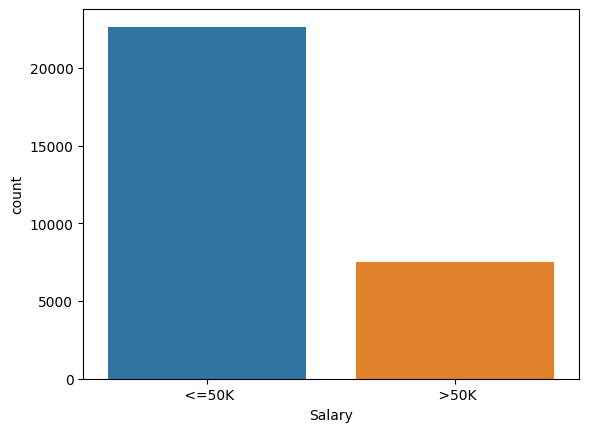

In [99]:
#countplot for Salary Attr.
sns.countplot(x= training_set['Salary'])
plt.show()

<Axes: xlabel='Salary', ylabel='count'>

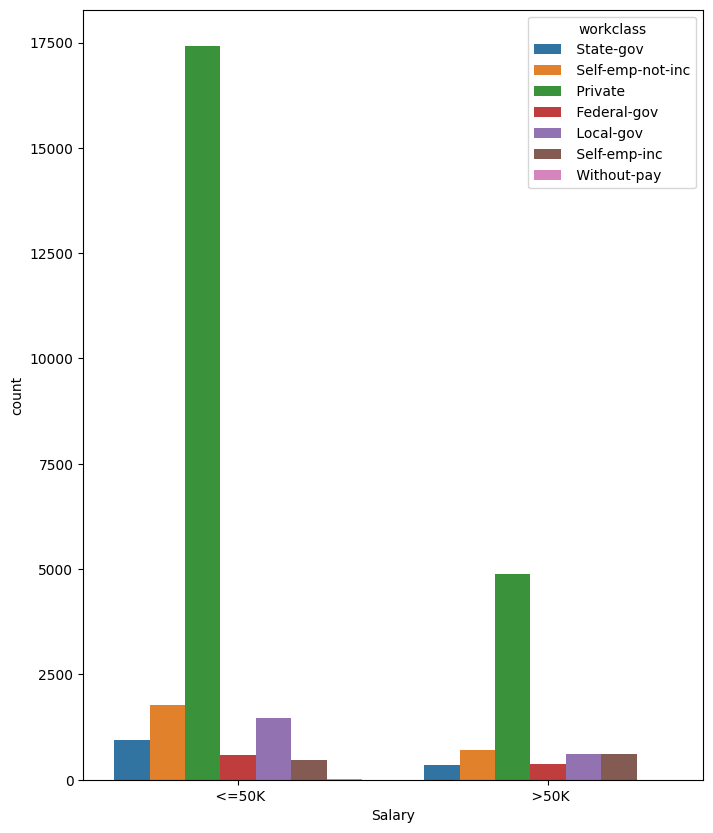

In [100]:
#countplot for Salary attr. with workclass as hue
plt.figure(figsize = (8,10))
sns.countplot(x = training_set['Salary'], hue= training_set['workclass'])

<Axes: xlabel='Salary', ylabel='count'>

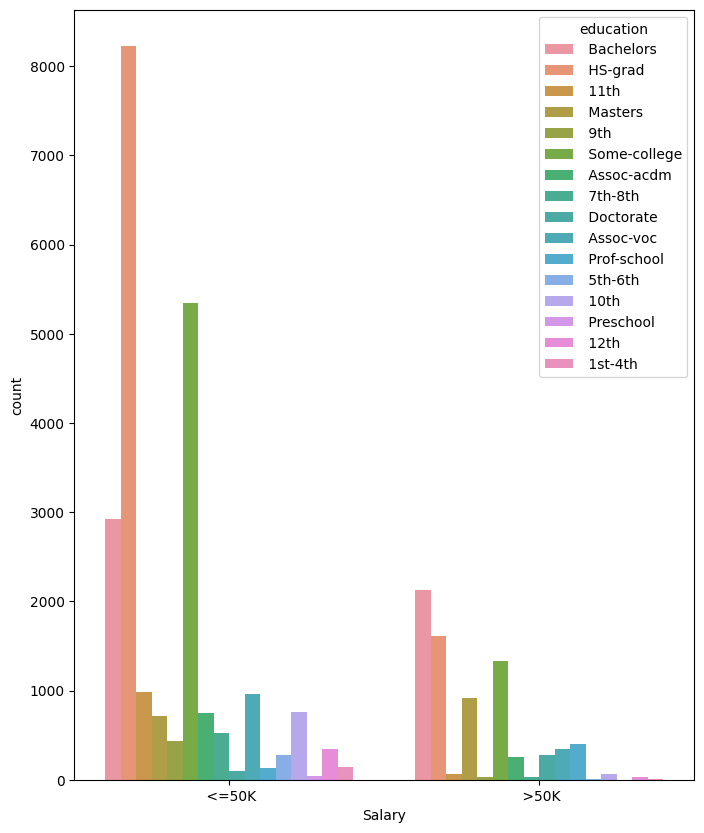

In [101]:
#countplot for Salary attr. with education as hue
plt.figure(figsize = (8,10))
sns.countplot(x = training_set['Salary'], hue= training_set['education'])

<Axes: xlabel='Salary', ylabel='count'>

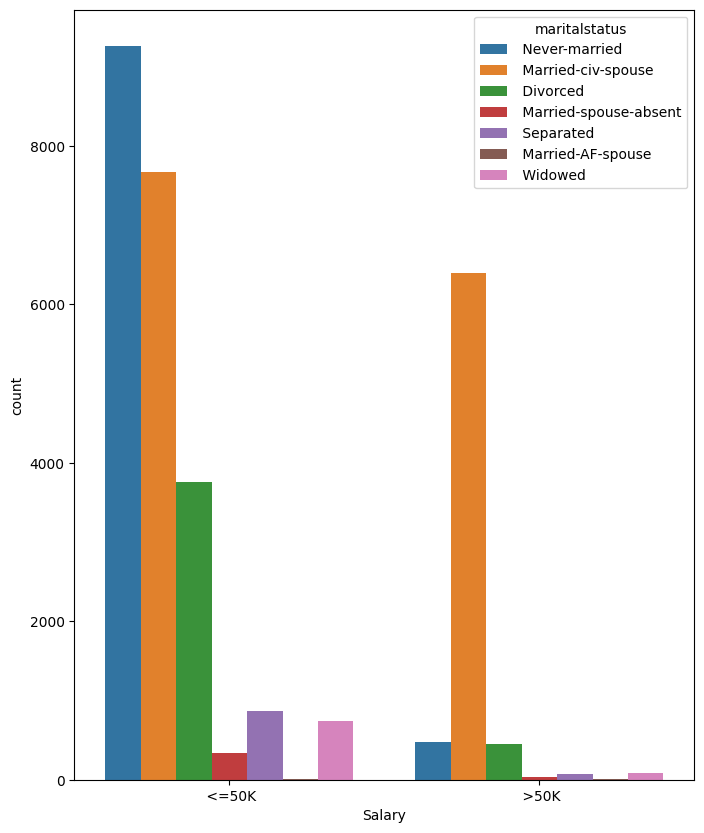

In [102]:
#countplot for Salary attr. with maritalstatus as hue
plt.figure(figsize = (8,10))
sns.countplot(x = training_set['Salary'], hue= training_set['maritalstatus'])

<Axes: xlabel='Salary', ylabel='count'>

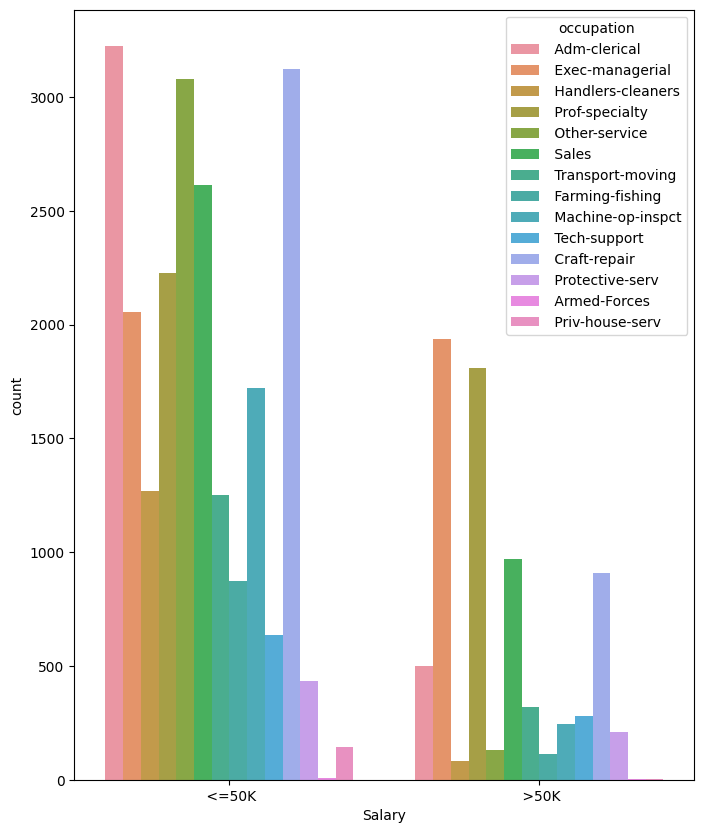

In [103]:
#countplot for Salary attr. with occupation as hue
plt.figure(figsize = (8,10))
sns.countplot(x = training_set['Salary'], hue= training_set['occupation'])

In [104]:
#Using label encoder to convert salary attr.
le = LabelEncoder()
training_set['Salary'] = le.fit_transform(training_set['Salary'])
testing_set['Salary'] = le.fit_transform(testing_set['Salary'])

In [105]:
#Checking the changes
training_set.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [106]:
testing_set.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [107]:
#getting the column names
training_set.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [108]:
#getting dummies for discrete columns in the training set
training_set = pd.get_dummies(data = training_set, columns = ['workclass', 'education', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'native'])

In [109]:
#viewing the training set
training_set

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [110]:
#getting dummies for discrete columns in the testing set
testing_set = pd.get_dummies(data = testing_set, columns = ['workclass', 'education', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'native'])

In [111]:
#Viewing the testing set
testing_set

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [112]:
#Importing warings to suppress any warnings
import warnings
warnings.filterwarnings('ignore')

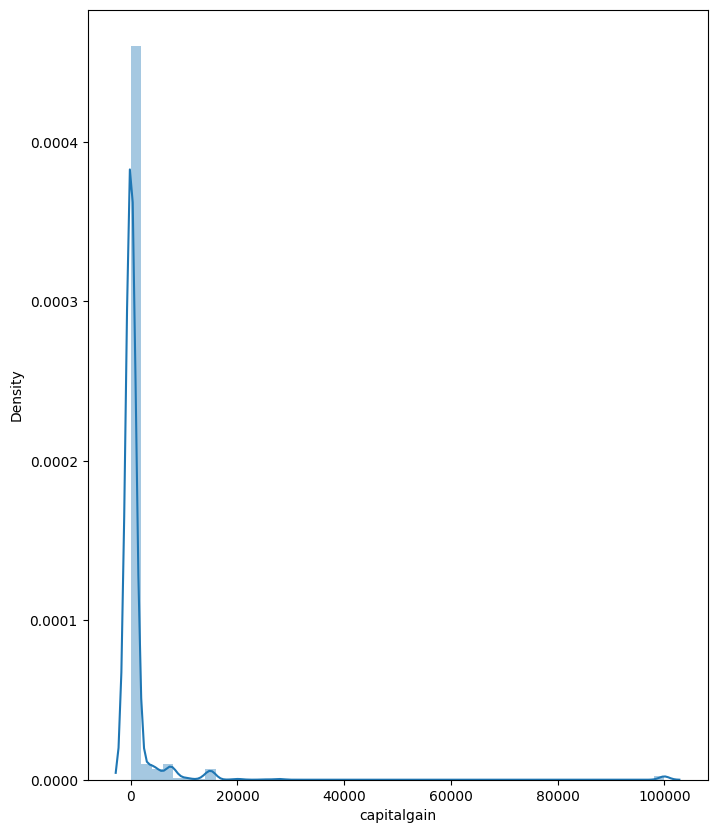

In [113]:
#Distribution plot for capital gain
plt.figure(figsize = (8,10))
sns.distplot(training_set['capitalgain'])
plt.show()

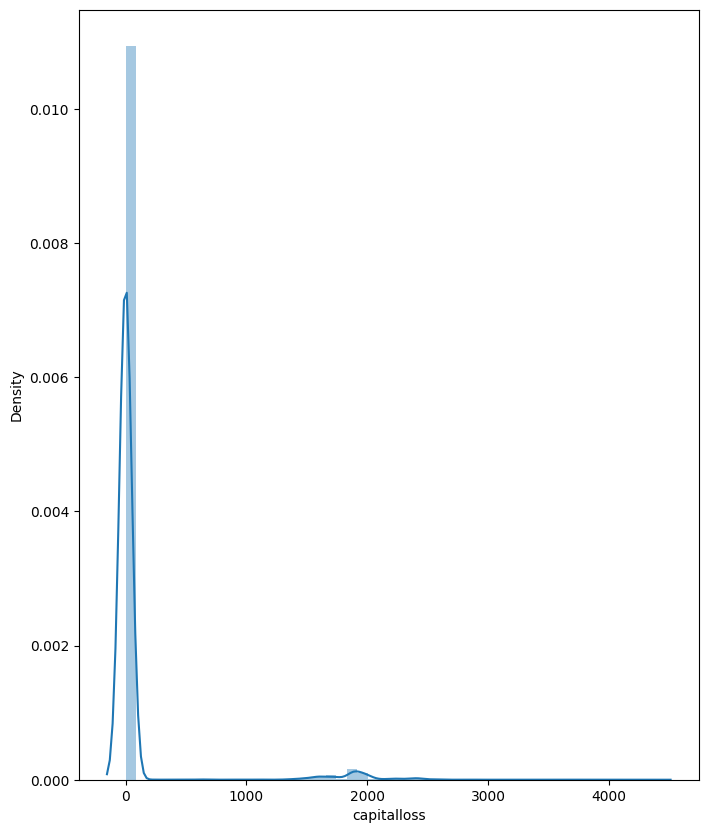

In [114]:
#Distribution plot for capital loss
plt.figure(figsize = (8,10))
sns.distplot(training_set['capitalloss'])
plt.show()

In [115]:
#Splitting the training data into dependent and independent variables
x_train = training_set.drop('Salary', axis =1)
y_train = training_set[['Salary']]

In [116]:
x_train.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
y_train.head()

,Salary
0,0
1,0
2,0
3,0
4,0


In [118]:
#Splitting the training data into dependent and independent variables
x_test = testing_set.drop('Salary', axis =1)
y_test = testing_set[['Salary']]

In [119]:
x_test.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [120]:
y_test.head()

,Salary
0,0
1,0
2,1
3,1
4,0


In [121]:
#Building the model Using Gaussian Naive Bayes
model = gb()
model.fit(x_train, y_train)

GaussianNB()

In [122]:
#Predicting the data from training set
y_train_pred = model.predict(x_train)

In [123]:
#confusion matrix
confusion_matrix(y_train, y_train_pred)

array([[18151,  4502],
       [ 1435,  6073]])

In [124]:
#Accuracy Score
accuracy_score(y_train, y_train_pred)

0.8031563940187659

In [125]:
#Classification Report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     22653
           1       0.57      0.81      0.67      7508

    accuracy                           0.80     30161
   macro avg       0.75      0.81      0.77     30161
weighted avg       0.84      0.80      0.81     30161



In [126]:
#Predicting the data from testing set
y_test_pred = model.predict(x_test)

In [127]:
#confusion matrix
confusion_matrix(y_test, y_test_pred)

array([[9073, 2287],
       [ 681, 3019]])

In [128]:
#Accuracy Score
accuracy_score(y_test, y_test_pred)

0.8029216467463479

In [129]:
#Classification Report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     11360
           1       0.57      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060



In [130]:
#Building the model using Multinomial Naive Bayes
model2 = mb()
model2.fit(x_train, y_train)

MultinomialNB()

In [131]:
#Predicting the data from training set
y_train_pred2 = model2.predict(x_train)

In [132]:
#confusion matrix
confusion_matrix(y_train, y_train_pred2)

array([[21717,   936],
       [ 5913,  1595]])

In [133]:
#Accuracy Score
accuracy_score(y_train, y_train_pred2)

0.7729186698053778

In [134]:
#Classification Report
print(classification_report(y_train, y_train_pred2))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86     22653
           1       0.63      0.21      0.32      7508

    accuracy                           0.77     30161
   macro avg       0.71      0.59      0.59     30161
weighted avg       0.75      0.77      0.73     30161



In [135]:
#Predicting the data from testing set
y_test_pred2 = model2.predict(x_test)

In [136]:
#confusion matrix
confusion_matrix(y_test, y_test_pred2)

array([[10891,   469],
       [ 2920,   780]])

In [137]:
#Accuracy Score
accuracy_score(y_test, y_test_pred2)

0.7749667994687915

In [138]:
#Classification Report
print(classification_report(y_test, y_test_pred2))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



In [139]:
#printing the accuracy scores for all the models
print(f'The accuracy score for training set with Gaussian Model is : {(accuracy_score(y_train, y_train_pred)):.2%}')
print(f'The accuracy score for testing set with Gaussian Model is : {(accuracy_score(y_test, y_test_pred)):.2%}')
print(f'The accuracy score for training set with Multinomial Model is : {(accuracy_score(y_train, y_train_pred2)):.2%}')
print(f'The accuracy score for testing set with Multinomial Model is : {(accuracy_score(y_test, y_test_pred2)):.2%}')

The accuracy score for training set with Gaussian Model is : 80.32%
The accuracy score for testing set with Gaussian Model is : 80.29%
The accuracy score for training set with Multinomial Model is : 77.29%
The accuracy score for testing set with Multinomial Model is : 77.50%
